# Image Fundamentals

Images are basically 2D or 3D arrays where each element in the array represent a pixel value

## Grey scale Image

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

pd.set_option('display.max_colwidth', None)

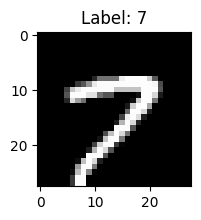

    0   1   2   3   4   5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21  22  23  24  25  26  27
0    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
1    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
2    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
3    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
4    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
5    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
6    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0  

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
i = 123

plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())

## Black and White image

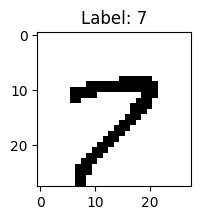

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27
0   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
1   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
2   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
3   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
4   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
5   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255

In [30]:
x_train[i] = np.where(x_train[i] > 128, 0, 255)

plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())

Please submit your feedback via https://futurepicx.com/feedback?id=2487AD91-5429-431C-902C-451AD5055F1A

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Activation
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [32]:
# Preprocess the data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [41]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [42]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6101 - loss: 4.9329 - val_accuracy: 0.8633 - val_loss: 0.5065
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8746 - loss: 0.4440 - val_accuracy: 0.9078 - val_loss: 0.3532
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9206 - loss: 0.2856 - val_accuracy: 0.9250 - val_loss: 0.2624
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9390 - loss: 0.2206 - val_accuracy: 0.9390 - val_loss: 0.2203
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9495 - loss: 0.1781 - val_accuracy: 0.9571 - val_loss: 0.1685
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9565 - loss: 0.1597 - val_accuracy: 0.9565 - val_loss: 0.1844
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9617 - loss: 0.1398 - val_accuracy: 0.9584 - val_loss: 0.1597
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9678 - loss: 0.1197 - 

In [45]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 0s - 1ms/step - accuracy: 0.9581 - loss: 0.1584
Test Accuracy: 95.81%


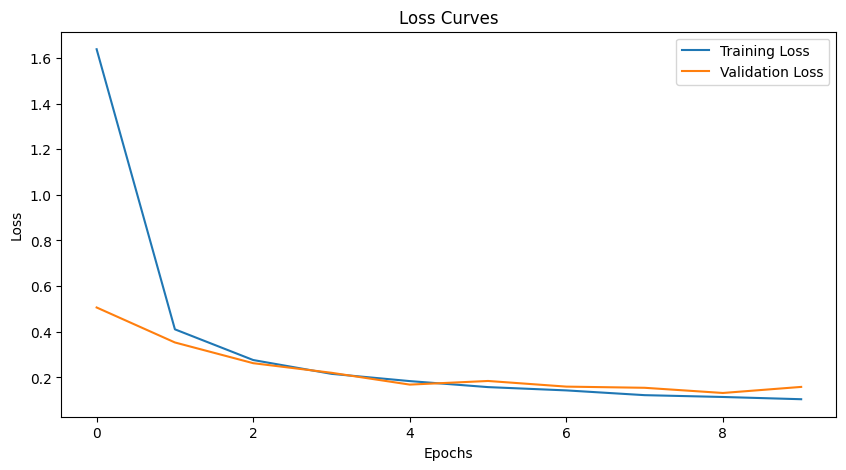

In [46]:
# Plot train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

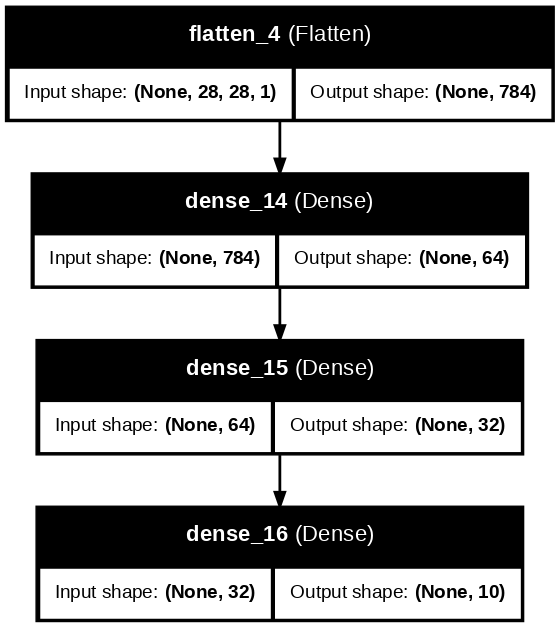

In [47]:
# Save and display the model architecture image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=100)

# Display the saved model architecture
from IPython.display import Image
Image(filename='model_architecture.png')